# DBSCAN Python Implementation Using Scikit-learn

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def plot_scatter(X,  color='k', alpha=0.8):
    #if use color index , the index must be between 0 and 1
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha)    #edgecolor='k'

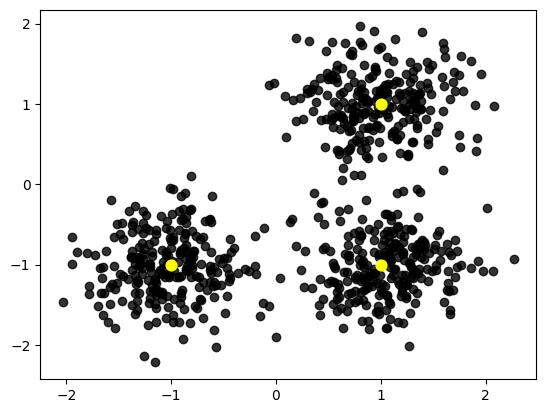

In [2]:
# Generate sample data
cluster_centers = np.array([[1, 1], [-1, -1], [1, -1]])
X, _ = make_blobs(n_samples=750, centers=cluster_centers, cluster_std=0.4,
                           random_state=0)
# X：一個 shape 為 (n_samples, n_features) 的 資料點座標陣列。
# _：實際上是第二個傳回值，代表這些資料點所屬的 類別標籤（labels），也就是每個點是屬於哪一個群集（cluster）的。
#_ 通常表示「我知道有這個值，但我不打算使用它」，這是一種慣用法

plot_scatter(X)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c='yellow',s=60)

In [3]:
sc = StandardScaler().fit(X)#標準化
X_train_std = sc.transform(X)#做轉換
cluster_centers_std = sc.transform(cluster_centers)

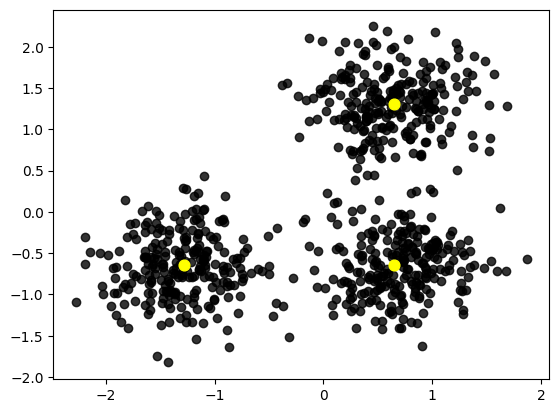

In [4]:
plot_scatter(X_train_std)
plt.scatter(cluster_centers_std[:,0],cluster_centers_std[:,1],c='yellow',s=60)

# DBSCAN

In [5]:
# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=10).fit(X_train_std)
labels = db.labels_
labels[:20]
# 在 DBSCAN 中：
# 每個點都會被指定一個 群集標籤（label），像是 0, 1, 2, ...
# 但是如果一個點 不屬於任何群集，因為它在任何一個群集的「密度」範圍外，這樣的點就被視為 雜訊點（noise point）。
# 這些雜訊點的標籤就是 -1。

array([ 0,  1,  0,  2,  0, -1,  1,  2,  0,  0,  1,  1,  1,  2, -1,  0, -1,
        1, -1,  2])

In [6]:
db.fit_predict(X_train_std)[:20]

array([ 0,  1,  0,  2,  0, -1,  1,  2,  0,  0,  1,  1,  1,  2, -1,  0, -1,
        1, -1,  2])

In [7]:

# Number of clusters in labels, ignoring noise if present.
def dbscan_report(model,X,draw_core=False):
    lab=model.fit_predict(X)
    n_clusters_ = len(set(lab)) - (1 if -1 in lab else 0) #把-1，outlier去掉 -->有幾群
    print(n_clusters_)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of each cluster:')
    color=['y','b','g','r','o']

    for cls,color in zip(list(set(lab)),color):#set(lab)算有多少種={-1, 0, 1, 2}
        cls_X=X[lab==cls] #X[] 會傳出True, False
        #print(cls_X,color)

        if cls != -1:
            print(len(lab[lab==cls]),end=' ')
            plt.scatter(cls_X[:, 0],cls_X[:, 1], alpha=0.8)
        else : #cls=-1 畫黑色
            plt.scatter(cls_X[:, 0],cls_X[:, 1],color='k', alpha=0.8)

    if draw_core==True:
        core_points=X[model.core_sample_indices_]#找出core point
        plt.scatter(core_points[:, 0],core_points[:, 1],color='r', alpha=0.9)
        core_points_mask = np.zeros_like(model.labels_, dtype=bool) #創造一個跟label同樣大小的[]
        core_points_mask[model.core_sample_indices_] = True #把core point的地方填ture
        border_points=X[~core_points_mask & (lab!=-1) ] #border點=不是corepoint且不是outlier的
        plt.scatter(border_points[:, 0],border_points[:, 1],color='g', alpha=1)


    print()
    n_noise_ = list(lab).count(-1)  # That laybe is -1 means noise
    print('Estimated ratio of noise points: %d/%d' % (n_noise_,len(X)))
    print('Estimated of Core points: %d' % (len(model.core_sample_indices_)))


3
Estimated number of clusters: 3
Estimated number of each cluster:
214 224 221 
Estimated ratio of noise points: 91/750
Estimated of Core points: 557


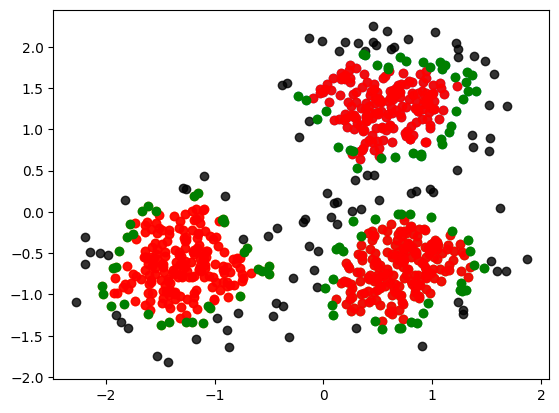

In [8]:
dbscan_report(db,X_train_std,draw_core=True)

3
Estimated number of clusters: 3
Estimated number of each cluster:
214 224 221 
Estimated ratio of noise points: 91/750
Estimated of Core points: 557


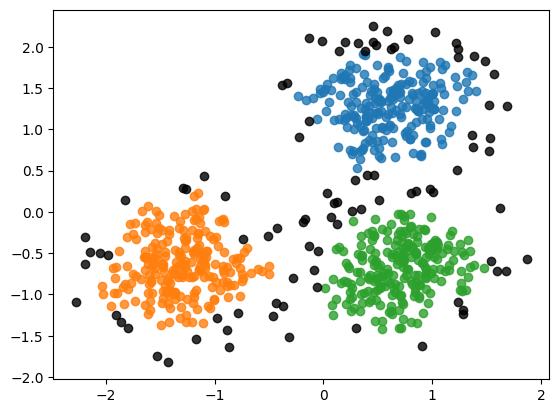

In [9]:
dbscan_report(db,X_train_std)

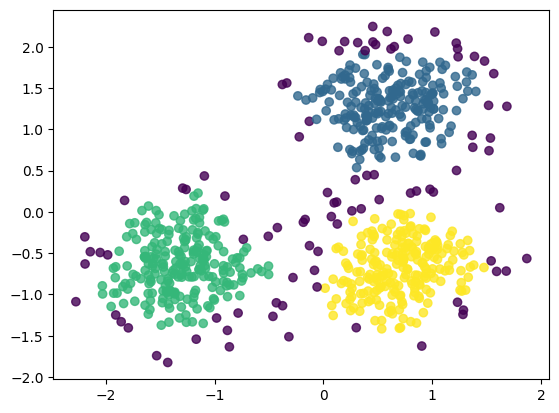

In [10]:
plot_scatter(X_train_std,db.fit_predict(X_train_std))

## Comparing with DBSCAN with different parameters
The low value minPts = 1 does not make sense, as then every point on its own will already be a cluster. With minPts ≤ 2, the result will be the same as of hierarchical clustering with the single link metric, with the dendrogram cut at height ε. Therefore, minPts must be chosen at least 3.

3
Estimated number of clusters: 3
Estimated number of each cluster:
214 224 221 
Estimated ratio of noise points: 91/750
Estimated of Core points: 557
--------------
5
Estimated number of clusters: 5
Estimated number of each cluster:
742 2 1 4 1 
Estimated ratio of noise points: 0/750
Estimated of Core points: 750


Text(0.5, 1.0, 'Clustering by DBSCAN')

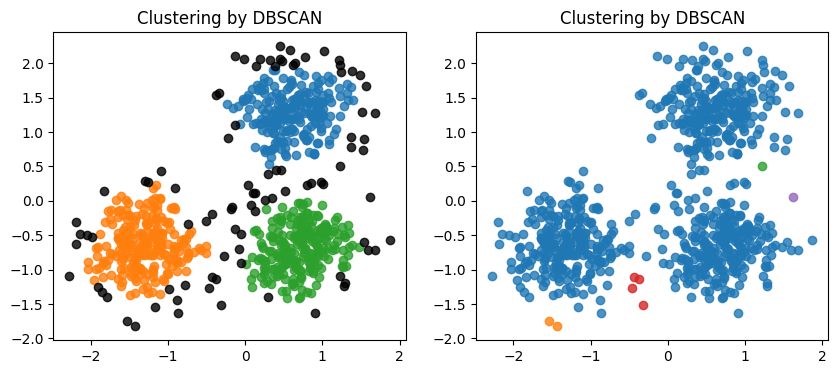

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(121)
db = DBSCAN(eps=0.2, min_samples=10).fit(X_train_std)
dbscan_report(db,X_train_std)
print('--------------')
plt.title("Clustering by DBSCAN")


plt.subplot(122)
db1 = DBSCAN(eps=0.3, min_samples=1).fit(X_train_std)
dbscan_report(db1,X_train_std)
plt.title("Clustering by DBSCAN")


## Special data

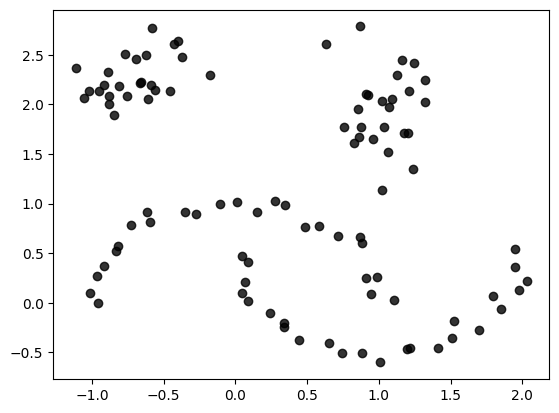

In [12]:
import sklearn.datasets as data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plot_scatter(test_data)

3
Estimated number of clusters: 3
Estimated number of each cluster:
51 25 23 
Estimated ratio of noise points: 1/100
Estimated of Core points: 94
2
Estimated number of clusters: 2
Estimated number of each cluster:
16 19 
Estimated ratio of noise points: 65/100
Estimated of Core points: 24


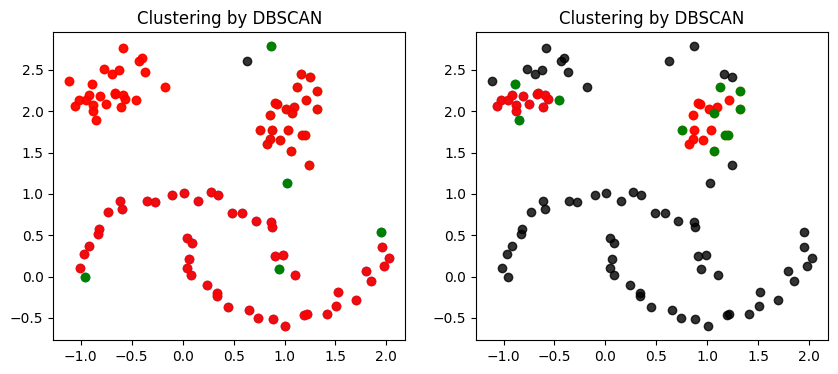

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(121)
db = DBSCAN(eps=0.5, min_samples=5).fit(test_data)
dbscan_report(db,test_data,draw_core=True)
plt.title("Clustering by DBSCAN")


plt.subplot(122)
db1 = DBSCAN(eps=0.2, min_samples=5).fit(test_data)
dbscan_report(db1,test_data,draw_core=True)
plt.title("Clustering by DBSCAN")
plt.show()

4
Estimated number of clusters: 4
Estimated number of each cluster:
25 25 25 23 
Estimated ratio of noise points: 2/100
Estimated of Core points: 90
2
Estimated number of clusters: 2
Estimated number of each cluster:
16 19 
Estimated ratio of noise points: 65/100
Estimated of Core points: 24


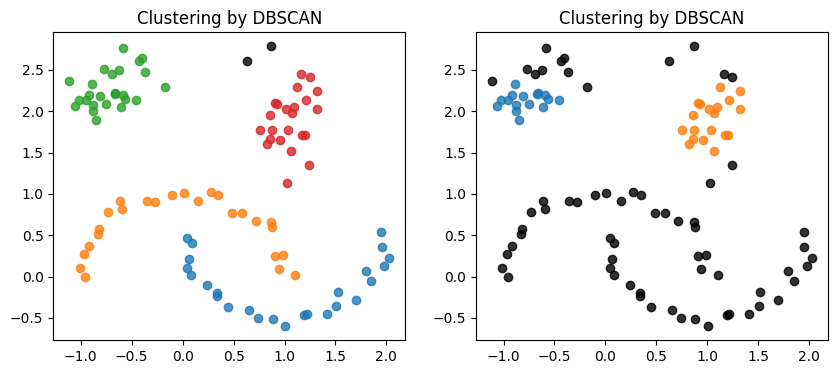

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(121)
db = DBSCAN(eps=0.4, min_samples=5).fit(test_data)
dbscan_report(db,test_data)
plt.title("Clustering by DBSCAN")


plt.subplot(122)
db1 = DBSCAN(eps=0.2, min_samples=5).fit(test_data)
dbscan_report(db1,test_data)
plt.title("Clustering by DBSCAN")
plt.show()

In [15]:
db.fit_predict(test_data)

array([ 0,  0,  1,  1,  1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  1, -1,
        2, -1,  2,  3,  3,  3,  2,  3,  2,  3,  2,  2,  2,  2,  3,  3,  3,
        3,  2,  2,  2,  3,  2,  3,  3,  3,  2,  3,  3,  2,  3,  2,  3,  2,
        2,  3,  2,  3,  2,  2,  2,  2,  2,  3,  2,  3,  3,  3,  2])

# Performacne Comparsion

4
Estimated number of clusters: 4
Estimated number of each cluster:
25 25 25 23 
Estimated ratio of noise points: 2/100
Estimated of Core points: 90


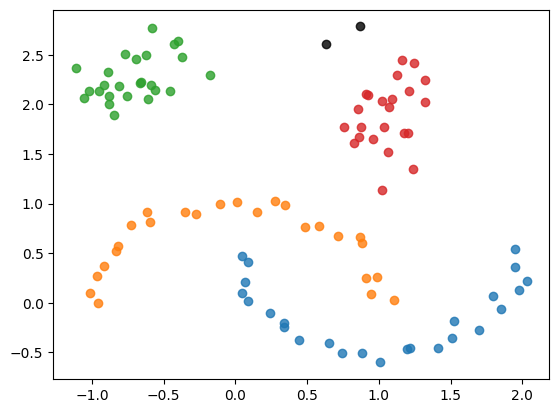

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

X_train_std=test_data
kmeans = KMeans(init='k-means++',n_clusters=4).fit(X_train_std)
kmeans.predict(X_train_std)


ac = AgglomerativeClustering(n_clusters=4,linkage='ward').fit(X_train_std)
#ac.fit_predict(X_train_std)


ac_single = AgglomerativeClustering(n_clusters=4,linkage='single').fit(X_train_std)
#ac_single.fit_predict(X_train_std)

#DBSCAN
db = DBSCAN(eps=0.4, min_samples=5).fit(X_train_std)
dbscan_report(db,X_train_std)


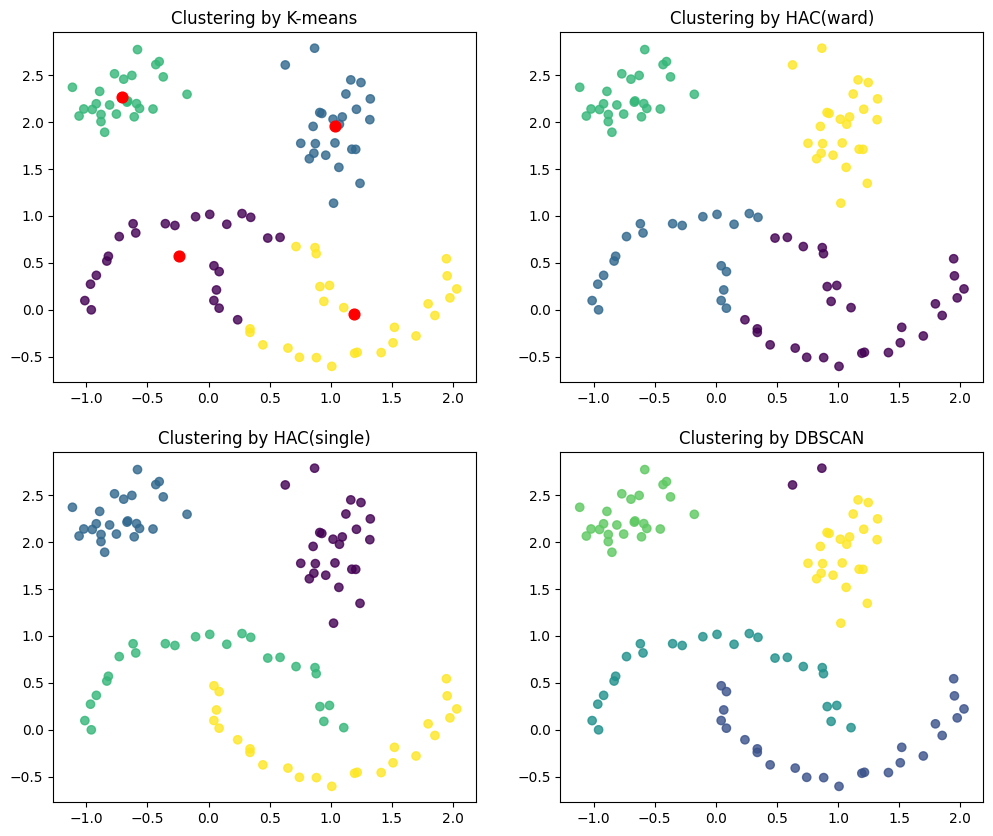

In [17]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plot_scatter(X_train_std,kmeans.predict(X_train_std))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")


plt.subplot(222)
plot_scatter(X_train_std,ac.fit_predict(X_train_std))
plt.title("Clustering by HAC(ward)")



plt.subplot(223)
plot_scatter(X_train_std,ac_single.fit_predict(X_train_std))
plt.title("Clustering by HAC(single)")


plt.subplot(224)
plot_scatter(X_train_std,db.fit_predict(X_train_std))
plt.title("Clustering by DBSCAN")
plt.show()
